In [16]:
import os
import pickle as pkl
from config import *
from sklearn.decomposition import PCA
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [21]:
DATA_DRIVE = "BERTembeddings"
files = [file for file in os.listdir(f"./{DATA_DRIVE}/") if file.endswith(".pkl")]

In [62]:
embeddings = []
labels = []
domains = []
for file in files:
    data = pkl.load(open(f"./{DATA_DRIVE}/" + file, "rb"))
    n = len(data['activations'])
    select_indices = np.random.choice(np.arange(n), min(1000, n), replace=False)
    # embeddings.extend(data['activations'][16])
    embeddings.extend(np.array(data['activations'])[select_indices])
    labels.extend(np.array(data['labels'])[select_indices])
    # domains.extend([FILE_DOMAIN_MAPPING[file]] * len(data['labels']))
    domains.extend([FILE_DOMAIN_MAPPING[file]] * len(select_indices))

embeddings = np.array(embeddings)
labels = [index_class_mapping[x] for x in labels]

In [63]:
pca = PCA(n_components=0.95)
pca_embeddings = pca.fit_transform(embeddings)

tsne = TSNE(n_components=2)
tsne_embeddings = tsne.fit_transform(pca_embeddings)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


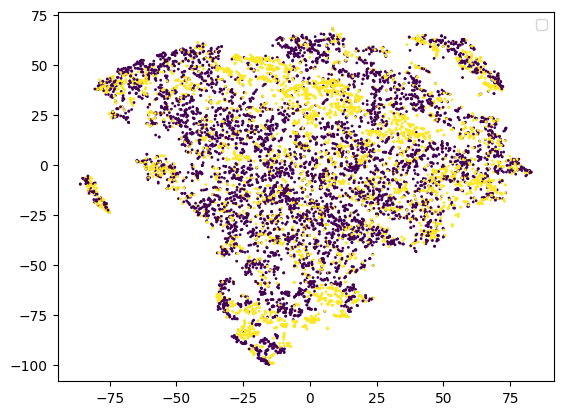

In [69]:
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=labels, s=1)

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


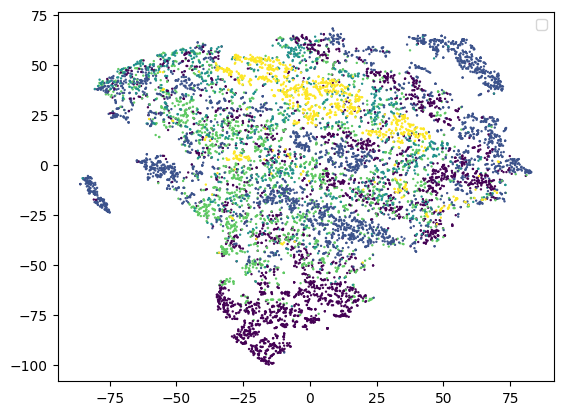

In [66]:
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=domains, s=0.5)
plt.legend()
plt.show()